In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
N, D_in, H, D_out = 2, 100, 50, 1 #N 데이터 갯수, D_in 뉴런갯수, H 연결된다발, D_out 출력 수치

In [28]:
x = np.random.randn(N, D_in) #인풋 값 이숫자를 보고
y = np.random.randn(N, D_out) #결과 값 결과값을 계산해라

print(x.shape)
print(y.shape)
print(x)

(2, 100)
(2, 1)
[[ 0.57441829  1.4009815   1.18233731 -0.78019834  0.30882602 -1.26941164
   0.84966093  0.20519094  0.36687731  0.45663847 -0.21692115  0.79274796
  -0.3462572  -1.0513458  -0.03849185 -0.89119652 -0.30286896  1.30256543
   0.29346332  0.47122803  0.11986082  0.66532467 -1.06612623 -0.34326188
   0.8689499   0.0757234   0.06663295 -0.49195698  0.82611568 -1.3999881
  -1.05923213  1.05609276 -1.30372579 -0.18793752 -0.95591525 -1.42040344
   1.14945556 -0.03525543  0.34953552 -0.21036929  2.21295084  0.25748095
   0.38381731  0.64600785  0.03689351 -0.8247048   0.19412234 -0.07128472
  -0.23602663 -2.6818204  -0.31156358 -0.40331283  0.46922346  0.01928204
  -0.18067701  0.08965604 -0.37804211 -1.35007299  0.45372198  0.68499039
   0.30845095  0.22258917 -0.0888965   0.2866256  -1.28283239  0.2688715
  -0.89481246 -0.90009803  1.34672586  0.40220948 -1.33593115  0.32966666
   0.40064237  0.06678398 -0.82671286  0.84860372 -0.71027803  0.53792747
  -0.1841441   0.2721479

In [29]:
w1 = np.random.randn(D_in, H) #뉴런(뇌세포)
w2 = np.random.randn(H, D_out)

print(w1.shape)
print(w2.shape)

(100, 50)
(50, 1)


In [30]:
#학습코드.. 데이터와 결과값을 보고 학습 과정을 통해 0의 값에 도달하면 최고점
y_pred_list = list()
loss_list = list()
learning_rate = 1e-6
for t in range(500):
    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    y_pred = h_relu.dot(w2)
    y_pred_list.append(y_pred[0][0])

    loss = np.square(y_pred - y).sum()
    loss_list.append(loss)
    print(t, loss)

    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)

    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 5309.81573890156
1 5208.305978096524
2 5108.882952747979
3 5011.499948969302
4 4916.111418926004
5 4822.672947539741
6 4731.141220294019
7 4641.473992099771
8 4553.630057180564
9 4467.569219938985
10 4383.252266767449
11 4300.640938768158
12 4219.697905348501
13 4140.386738659497
14 4062.6718888463233
15 3986.518660081254
16 3911.8931873505244
17 3838.7624139678064
18 3767.0940697881597
19 3696.856650097302
20 3628.019395152191
21 3560.5522703496904
22 3494.425947001214
23 3429.611783692088
24 3366.081808205038
25 3303.8086999883226
26 3242.765773149595
27 3182.9269599572717
28 3124.266794832224
29 3066.7603988128167
30 3010.3834644773497
31 2955.1122413084413
32 2900.923521484394
33 2847.794626083311
34 2795.7033916862174
35 2744.628157365883
36 2694.5477520486675
37 2645.441482237086
38 2597.2891200813606
39 2550.0708917884895
40 2503.7674663580183
41 2458.3599446338485
42 2413.829848662043
43 2370.159111344761
44 2327.3300663809414
45 2285.3254384846764
46 2244.1283338724384
47 22

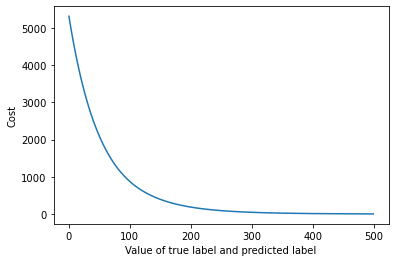

In [32]:
#결과 값을 그래프로 표현
step_list = [i for i in range(len(loss_list))]
plt.plot(step_list,loss_list)
plt.ylabel('Cost')
plt.xlabel('Value of true label and predicted label')
plt.show()